In [1]:
#설명 가능한 딥러닝
!pip install tf_explain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#!pip install opencv

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16

#xai 알고리즘 불러오는 부분 (폐쇄성 민감도 방식식)
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

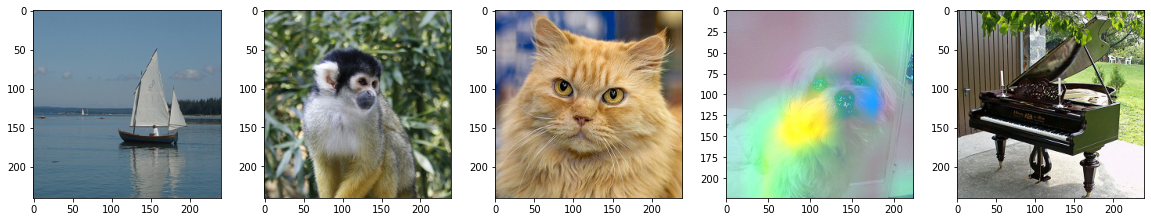

In [3]:
# /content/drive/MyDrive/sesac_ai/code/deeplearning/data/img

#원본 이미지가 들어갈 리스트 만들기
images_originals = []

#원본 이미지가 저장된 폴더에서 하나씩 img 불러서 리스트에 담기
for img in glob.glob('/content/drive/MyDrive/sesac_ai/code/deeplearning/data/img/*_0.jpg'):
    images_originals.append(mpimg.imread(img))

#이미지 크기 
plt.figure(figsize=(20,20))

for i, image_o in enumerate(images_originals):
    plt.subplot(5,5, i+1) #인덱스가 0이니까 +1 해주기
    plt.imshow(image_o)

In [4]:
#사전에 학습된 딥러닝 모델 불러오기

model = VGG16(weights='imagenet', include_top=True)

In [5]:
#원본 이미지 이름과 imagenet에서 해당 이미지 인덱스

input_list=['maltese', 'persian_cat', 'squirrel_monkey', 'grand_piano', 'yawl']
imagenet_index=['153', '283', '382', '579', '914']

In [6]:
#gradient CAM 선택
explainer=GradCAM()

#gradient CAM 알고리즘이 적용된 이미지가 들어갈 빈 리스트 생성
images_cams=[]

#gradient CAM 알고리즘 실행
for l,i in zip(input_list, imagenet_index):
   img = load_img('/content/drive/MyDrive/sesac_ai/code/deeplearning/data/img/{}_0.jpg'.format(l),
                target_size=(224,224))
   #이미지를 불러와서 내부에서 처리 될 이미지 크기 설정
   img = img_to_array(img)
   #이미지를 넘파이 배열로 변환
   data=([img], None)
   grid = explainer.explain(data, model, int(i)) 
   #explainer.explain(데이터, 모델, 클래스)
   explainer.save(grid,'.', '/content/drive/MyDrive/sesac_ai/code/deeplearning/data/img/{}_cam.jpg'.format(l))
   #실행 후 저장되는 이름
   #save(output, 저장될 폴더, 저장될 이름)



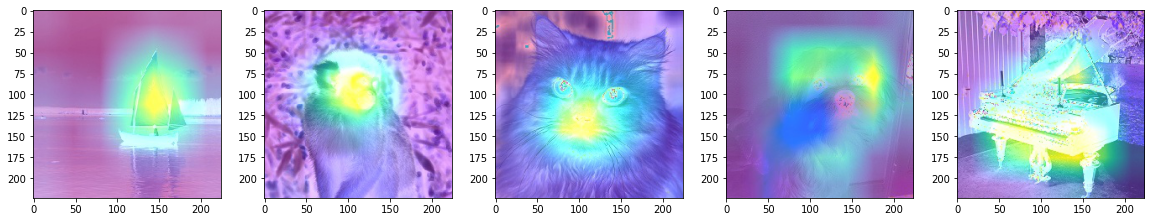

In [7]:
#gradient CAM 알고리즘이 적용된 이미지 불러오기
plt.figure(figsize=(20,20))

for img in glob.glob('/content/drive/MyDrive/sesac_ai/code/deeplearning/data/img/*_cam.jpg'):
    images_cams.append(mpimg.imread(img))

for i, image_c in enumerate(images_cams):
    plt.subplot(5,5, i+1) #인덱스가 0이니까 +1 해주기
    plt.imshow(image_c)



In [9]:
#오클루전 알고리즘 선택
explainer=OcclusionSensitivity()

#알고리즘이 적용된 이미지가 들어갈 빈 리스트 만들기기
images_occls=[]

#패치 크기 정하기 사진을 가리며 움직이는 검은색 사각형의 크기기
patch_size=40

#오클루전 알고리즘 실행
for l,i in zip(input_list, imagenet_index):
    img=load_img('/content/drive/MyDrive/sesac_ai/code/deeplearning/data/img/{}_0.jpg'.format(l),
                target_size=(224,224))
    img=img_to_array(img)
    data=([img], None)
    #패치 크기 설정 추가
    grid = explainer.explain(data, model, int(i), patch_size)
    explainer.save(grid, '.', '/content/drive/MyDrive/sesac_ai/code/deeplearning/data/img/{}_occl.jpg'.format(l))

2/2 [==============================] - 22s 2s/step


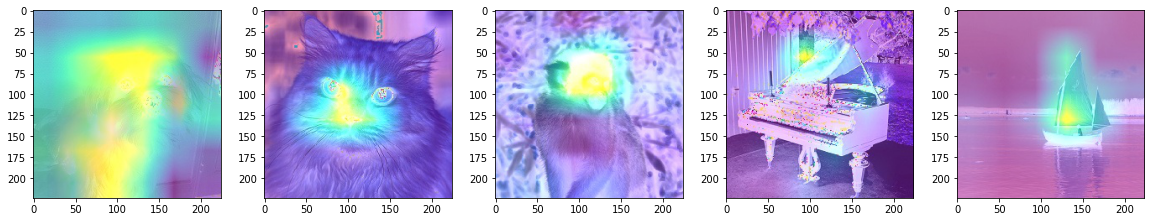

In [10]:
#오클루전 알고리즘이 적용된 이미지 불러오기
plt.figure(figsize=(20,20))

for img in glob.glob('/content/drive/MyDrive/sesac_ai/code/deeplearning/data/img/*_occl.jpg'):
    images_occls.append(mpimg.imread(img))

for i, image in enumerate(images_occls):
    plt.subplot(5,5, i+1) #인덱스가 0이니까 +1 해주기
    plt.imshow(image)

5/5 [==============================] - 89s 17s/step


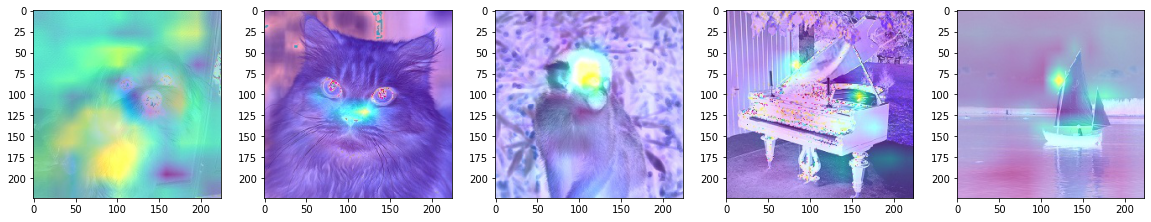

In [11]:
#오클루전 알고리즘 선택
explainer=OcclusionSensitivity()

#알고리즘이 적용된 이미지가 들어갈 빈 리스트 만들기기
images_occls=[]

#패치 크기 정하기 사진을 가리며 움직이는 검은색 사각형의 크기기
patch_size=20

#오클루전 알고리즘 실행
for l,i in zip(input_list, imagenet_index):
    img=load_img('/content/drive/MyDrive/sesac_ai/code/deeplearning/data/img/{}_0.jpg'.format(l),
                target_size=(224,224))
    img=img_to_array(img)
    data=([img], None)
    #패치 크기 설정 추가
    grid = explainer.explain(data, model, int(i), patch_size)
    explainer.save(grid, '.', '/content/drive/MyDrive/sesac_ai/code/deeplearning/data/img/{}_occl.jpg'.format(l))

#오클루전 알고리즘이 적용된 이미지 불러오기
plt.figure(figsize=(20,20))

for img in glob.glob('/content/drive/MyDrive/sesac_ai/code/deeplearning/data/img/*_occl.jpg'):
    images_occls.append(mpimg.imread(img))

for i, image in enumerate(images_occls):
    plt.subplot(5,5, i+1) #인덱스가 0이니까 +1 해주기
    plt.imshow(image)